In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd

In [2]:
image = Image.open("cat.png")

**Re-organize**

In [11]:
# convert the matrix (733, 490, 3) into (733 * 490, 3)
data = np.array(image)
data = np.reshape(data, [data.shape[2], -1])
data = np.transpose(data)
data.shape

(359170, 3)

In [34]:
comp_image.shape

(359170, 3)

In [37]:
(np.array(comp_image/255).reshape(*image.size, -1))

array([[[0.76441936, 0.78459817, 0.57753832],
        [0.76441936, 0.78459817, 0.57753832],
        [0.76441936, 0.78459817, 0.57753832],
        ...,
        [0.85223328, 0.22244482, 0.42788239],
        [0.832461  , 0.53625166, 0.42718268],
        [0.85223328, 0.22244482, 0.42788239]],

       [[0.87373644, 0.17504634, 0.69694123],
        [0.82329564, 0.46394773, 0.68714341],
        [0.85223328, 0.22244482, 0.42788239],
        ...,
        [0.76441936, 0.78459817, 0.57753832],
        [0.78933508, 0.79880259, 0.2459577 ],
        [0.76441936, 0.78459817, 0.57753832]],

       [[0.76441936, 0.78459817, 0.57753832],
        [0.76441936, 0.78459817, 0.57753832],
        [0.76441936, 0.78459817, 0.57753832],
        ...,
        [0.85223328, 0.22244482, 0.42788239],
        [0.85223328, 0.22244482, 0.42788239],
        [0.832461  , 0.53625166, 0.42718268]],

       ...,

       [[0.39090282, 0.26719715, 0.58909688],
        [0.39090282, 0.26719715, 0.58909688],
        [0.8730355 , 0

**Clustering**

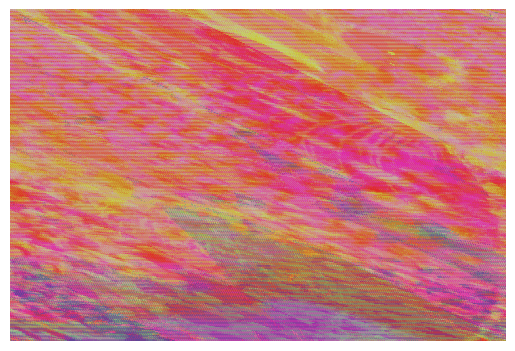

In [36]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10, tol=0.01, random_state=0).fit(data)

comp_image = []
for i in model.labels_:
    centroid = list(model.cluster_centers_[i])
    comp_image.append(centroid)
comp_image = np.array(comp_image).reshape(*data.shape)

plt.imshow(np.array(comp_image/255).reshape(*image.size, -1))
plt.axis('off')
plt.savefig('compressed.png')
plt.show()

# I can't figure out why it is so different....

**Size of original and compressed images**

In [28]:
from io import BytesIO

img_old = BytesIO()
image_old = Image.fromarray(np.uint8(image))
image_old.save(img_old, 'png')
print('Size of original image (KB): ' + str(round(img_old.tell()/1024 , 0)))

compressed = BytesIO()
image_new = Image.fromarray(np.uint8(comp_image))
image_new.save(compressed, 'png')
print('Size of compressed image (KB): ' + str(round(compressed.tell()/1024 , 0)))

Size of original image (KB): 650.0
Size of compressed image (KB): 94.0
